In [13]:
import torch
import torchvision
import torchvision.transforms as transfroms
import matplotlib.pyplot as plt
import numpy as np

In [14]:
batch_size = 10
transfrom = transfroms.Compose([
    transfroms.ToTensor(),
    transfroms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

In [15]:
trainset = torchvision.datasets.CIFAR10(root="./data",train=True, download=True,  transform=transfrom)
trainloder = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

In [16]:
testset = torchvision.datasets.CIFAR10(root="./data",train=False, download=True,  transform=transfrom)
testloder = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [17]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [18]:
dataiter = iter(trainloder)
images, labels = dataiter.__next__()

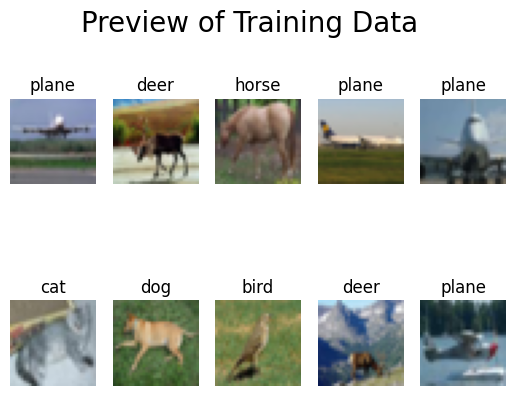

In [19]:
for i in range(batch_size):
    plt.subplot(2, int(batch_size/2), i+1)
    img = images[i]
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis('off')
    plt.title(classes[labels[i]])
    
plt.suptitle("Preview of Training Data", size=20)
plt.show()

# Neural Network

In [20]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6, 5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
